# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

# Batuhan Sarıtaş

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read csv
df = pd.read_csv("diamonds.csv")
df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [257]:
df.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [307]:
df.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='price', ylabel='count'>

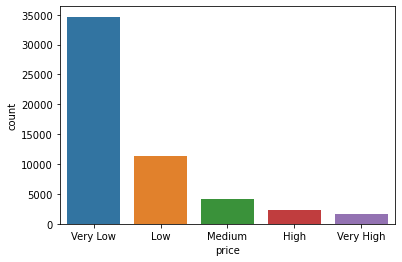

In [308]:
# Our label Distribution (countplot)
from seaborn import countplot
countplot(x =df.price)

<AxesSubplot:xlabel='cut', ylabel='count'>

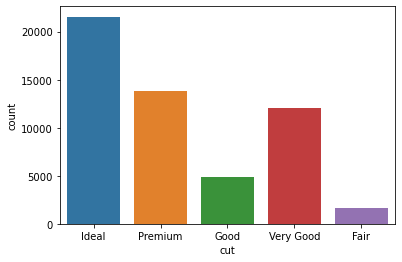

In [241]:
countplot(x = df.cut)

<AxesSubplot:xlabel='color', ylabel='count'>

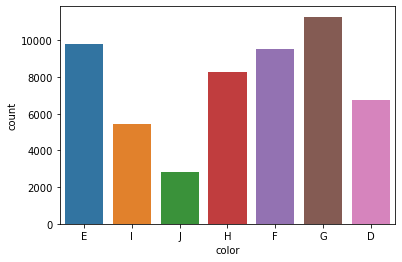

In [260]:
countplot(x= df.color)

<AxesSubplot:xlabel='clarity', ylabel='count'>

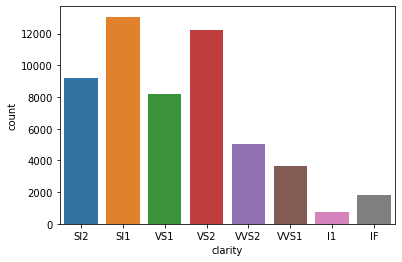

In [243]:
countplot(x = df.clarity)

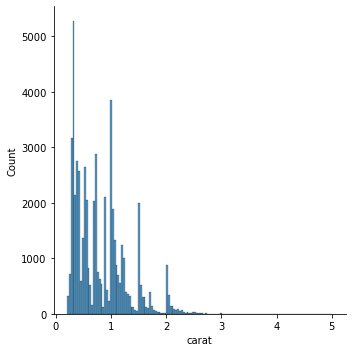

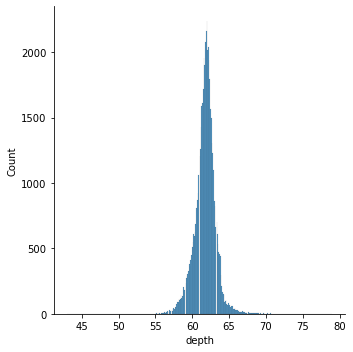

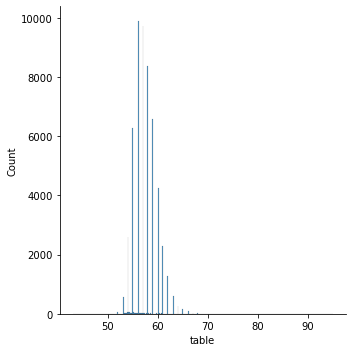

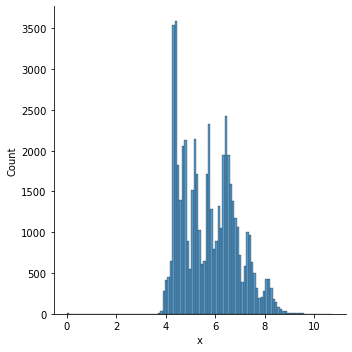

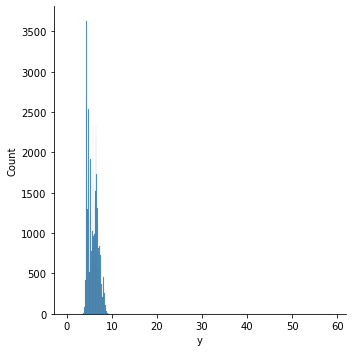

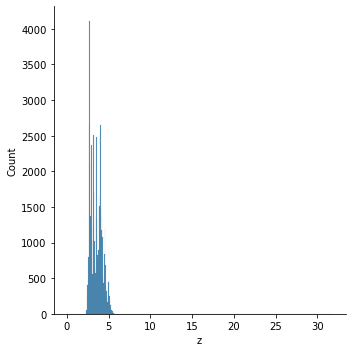

In [4]:
# Example EDA (distplot)
from seaborn import displot
for feature in ["carat","depth","table","x","y","z"]:
    print(displot(df[feature]))

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [310]:
df.drop_duplicates()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


# Outlier Handling
Let us commence with outlier handling via IQR method before further data preprocessing.

In [311]:
for feature in ["carat","depth","table","x","y","z"]:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df= df.loc[(df[feature]>Q1-1.5*IQR) & (df[feature]<Q3+1.5*IQR),:].dropna()
df


,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


# Feature Scaling
Although Decision Trees do not require any feature scaling, we will apply not only Decision Tree Classifier but also Support Vector Classifier for this problem. Thus, feature scaling is preferable at this point.

In [312]:
for feature in ["carat","x","y","z","table","depth"]:
    df.loc[:,feature] = (df.loc[:,feature] - min(df.loc[:,feature]))/(max(df.loc[:,feature])-min(df.loc[:,feature]))

df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.016760,Ideal,E,SI2,0.444444,0.263158,0.049217,0.066225,0.279452,Very Low
1,2,0.005587,Premium,E,SI1,0.129630,0.789474,0.035794,0.035320,0.246575,Very Low
3,4,0.050279,Premium,I,VS2,0.611111,0.526316,0.105145,0.121413,0.334247,Very Low
4,5,0.061453,Good,J,SI2,0.777778,0.526316,0.136465,0.147903,0.367123,Very Low
5,6,0.022346,Very Good,J,VVS2,0.685185,0.438596,0.046980,0.061810,0.293151,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.290503,Ideal,D,SI1,0.314815,0.438596,0.451902,0.459161,0.572603,Very Low
53936,53937,0.290503,Good,D,SI1,0.740741,0.263158,0.438479,0.456954,0.602740,Very Low
53937,53938,0.279330,Very Good,D,SI1,0.685185,0.701754,0.431767,0.441501,0.589041,Very Low
53938,53939,0.368715,Premium,H,SI2,0.351852,0.526316,0.541387,0.538631,0.638356,Very Low


# Feature Encoding
We need to encode categorical features in order our model to understand and train.

In [313]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = df.price
df = df.drop("price",axis = 1)
for feature in ["cut","color","clarity"]:
    df = pd.concat([df, pd.get_dummies(df[feature])], axis=1)
    df = df.drop(feature,axis=1)
target = le.fit_transform(target)
df["price"] =target
df

,index,carat,depth,table,x,y,z,Fair,Good,Ideal,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price
0,1,0.016760,0.444444,0.263158,0.049217,0.066225,0.279452,0,0,1,...,0,0,0,0,1,0,0,0,0,4
1,2,0.005587,0.129630,0.789474,0.035794,0.035320,0.246575,0,0,0,...,0,0,0,1,0,0,0,0,0,4
3,4,0.050279,0.611111,0.526316,0.105145,0.121413,0.334247,0,0,0,...,0,0,0,0,0,0,1,0,0,4
4,5,0.061453,0.777778,0.526316,0.136465,0.147903,0.367123,0,1,0,...,1,0,0,0,1,0,0,0,0,4
5,6,0.022346,0.685185,0.438596,0.046980,0.061810,0.293151,0,0,0,...,1,0,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.290503,0.314815,0.438596,0.451902,0.459161,0.572603,0,0,1,...,0,0,0,1,0,0,0,0,0,4
53936,53937,0.290503,0.740741,0.263158,0.438479,0.456954,0.602740,0,1,0,...,0,0,0,1,0,0,0,0,0,4
53937,53938,0.279330,0.685185,0.701754,0.431767,0.441501,0.589041,0,0,0,...,0,0,0,1,0,0,0,0,0,4
53938,53939,0.368715,0.351852,0.526316,0.541387,0.538631,0.638356,0,0,0,...,0,0,0,0,1,0,0,0,0,4


# Correlation
We might consider extracting some of the features from out data at this point, let us analyze the correlation tableu.

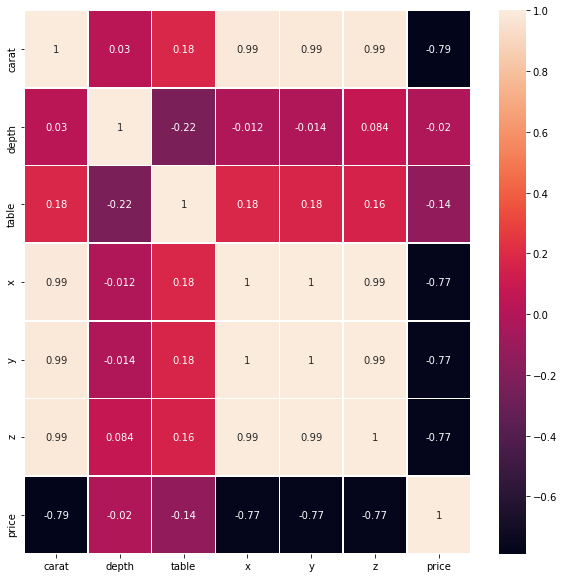

In [314]:
correlation = df.loc[:,["carat","depth","table","x","y","z","price"]].corr()

fig, w = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot = True, linewidths=.5, ax=w) 

plt.show()

# ML Application
Define models.
Fit models.
Evaluate models for both train and test dataset.
Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# Handling Imbalanced Data

<AxesSubplot:ylabel='count'>

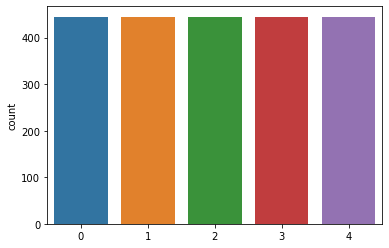

In [315]:

from imblearn.under_sampling import RandomUnderSampler

df.price = target
df = df.drop("price",axis = 1)

model = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = model.fit_resample(df, target)

countplot(x =y_resampled)

# Metric Evaluation
Since we have balanced our data, the metric scores we will gain from our models are likely to be similar to one another. This would not be the case for imbalanced data due to accuracy being misleading. For our case, we might want to use F1 Score. F1 score takes the harmonic mean of precision and recall metrics and usually preferable for multiclass classifications.

# Decision Tree Classifier

In [355]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size= 0.3, random_state= 42)
performances=[]


In [356]:

for m in [64,128,256,512,1024]:
    models = DecisionTreeClassifier(random_state=42, max_leaf_nodes=m)
    cv = cross_validate(models,X_train, y_train, cv = 3, n_jobs=-1,return_estimator=True)
    print("max_leaf_nodes:",m)
    print("Mean training accuracy:",np.mean(cv['test_score']))
    print("Test accuracy:",cv["estimator"][0].score(X_test,y_test))
    print("*"*30)

pred = DecisionTreeClassifier(max_leaf_nodes=256).fit(X_train,y_train).predict(X_test)
performances.append(f1_score(y_test, pred, average= "macro")*100)

max_leaf_nodes: 64
Mean training accuracy: 0.9910083493898524
Test accuracy: 0.9940119760479041
******************************
max_leaf_nodes: 128
Mean training accuracy: 0.9910083493898524
Test accuracy: 0.9940119760479041
******************************
max_leaf_nodes: 256
Mean training accuracy: 0.9910083493898524
Test accuracy: 0.9940119760479041
******************************
max_leaf_nodes: 512
Mean training accuracy: 0.9910083493898524
Test accuracy: 0.9940119760479041
******************************
max_leaf_nodes: 1024
Mean training accuracy: 0.9910083493898524
Test accuracy: 0.9940119760479041
******************************


Precision =  0.9913992304473256
Recall =  0.9909643533001198
Accuracy =  0.9910179640718563
F1 Score = 0.991138336713996


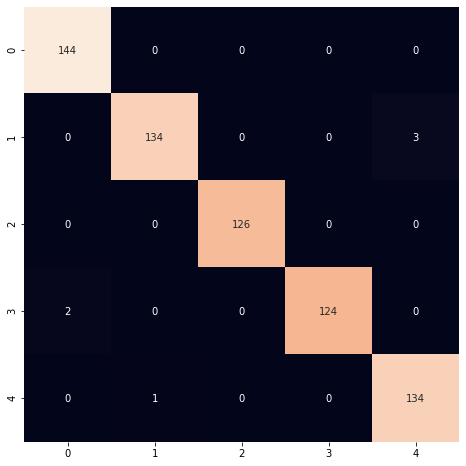

In [358]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Precision = ",precision_score(y_test, pred, average= "macro"))
print("Recall = ",recall_score(y_test, pred, average= "macro"))
print("Accuracy = ",accuracy_score(y_test,pred))
print("F1 Score =",f1_score(y_test, pred, average= "macro"))

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = ".0f")


# Overfitting & Underfitting
In our first model, we have encountered with great accuracy results. If there was overfitting or underfitting, our training results would not match the test results. It seems like both results are pretty close and around 0.99, there is no need to extra tuning.

# Random Forest Classifier

In [359]:
from sklearn.ensemble import RandomForestClassifier

models = RandomForestClassifier(random_state=42)
cv = cross_validate(models,X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)
print("Mean training accuracy:",np.mean(cv['test_score']))
print("Test accuracy:",cv["estimator"][0].score(X_test,y_test))
print("*"*30)

pred = cv["estimator"][0].predict(X_test)
performances.append(f1_score(y_test, pred, average= "macro")*100)

Mean training accuracy: 0.9736673089274245
Test accuracy: 0.968562874251497
******************************


Precision =  0.968822463768116
Recall =  0.9695032441200324
Accuracy =  0.968562874251497
F1 Score = 0.9687209663011644


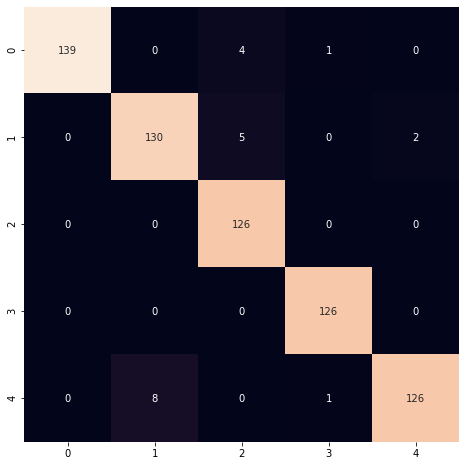

In [360]:

print("Precision = ",precision_score(y_test, pred, average= "macro"))
print("Recall = ",recall_score(y_test, pred, average= "macro"))
print("Accuracy = ",accuracy_score(y_test,pred))
print("F1 Score =",f1_score(y_test, pred, average= "macro"))

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = ".0f")

# Overfitting & Underfitting
In our second model, we again have encountered with great accuracy results. If there was overfitting or underfitting, our training results would not match the test results. It seems like, once again, both results are pretty close and around 0.96, there is no need to extra tuning.

# XGBoost

In [361]:
import numpy as np
import xgboost as xgb
data_train = xgb.DMatrix(data=X_train, label=y_train)
data_test = xgb.DMatrix(data=X_test, label=y_test)
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
        'min_child_weight':2,   
         'num_class':5,
         "eval_metric":"logloss"
            }
model = xgb.train(param, data_train, 2)
preds1 = model.predict(data_test)
preds2 = model.predict(data_train)

pred1 = np.asarray([np.argmax(line) for line in preds1])
pred2 = np.asarray([np.argmax(line) for line in preds2])

print("Accuracy for train = ",accuracy_score(y_train,pred2))
print("Accuracy for test= ",accuracy_score(y_test,pred1))

performances.append(f1_score(y_test, pred1, average= "macro")*100)


Accuracy for train =  0.9993577392421323
Accuracy for test=  0.9970059880239521


Precision =  0.9972602739726029
Recall =  0.9968253968253968
Accuracy =  0.9970059880239521
F1 Score = 0.9970206896551724


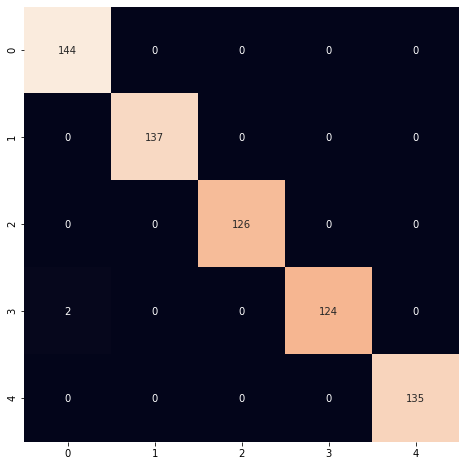

In [362]:
print("Precision = ",precision_score(y_test, pred1, average= "macro"))
print("Recall = ",recall_score(y_test, pred1, average= "macro"))
print("Accuracy = ",accuracy_score(y_test,pred1))
print("F1 Score =",f1_score(y_test, pred1, average= "macro"))

cm = confusion_matrix(y_test, pred1)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = ".0f")

# Overfitting & Underfitting
In our third model, we again have encountered with great accuracy results. If there was overfitting or underfitting, our training results would not match the test results. It seems like, once again, both results are pretty close and around 0.99, there is no need to extra tuning.

# Support Vector Classifier

In [363]:
from sklearn.svm import SVC

models = SVC(random_state=42)
cv = cross_validate(models,X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)
print("Mean training accuracy:",np.mean(cv['test_score']))
print("Test accuracy:",cv["estimator"][0].score(X_test,y_test))
print("*"*30)

pred = cv["estimator"][0].predict(X_test)
performances.append(f1_score(y_test, pred, average= "macro")*100)

Mean training accuracy: 0.8901734104046243
Test accuracy: 0.875748502994012
******************************


Precision =  0.8879391891412627
Recall =  0.8781431274861932
Accuracy =  0.875748502994012
F1 Score = 0.8757324575862306


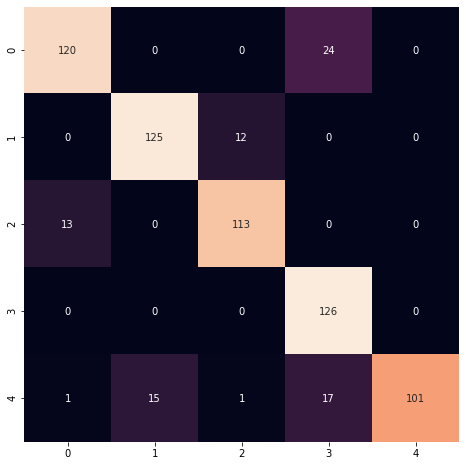

In [364]:
print("Precision = ",precision_score(y_test, pred, average= "macro"))
print("Recall = ",recall_score(y_test, pred, average= "macro"))
print("Accuracy = ",accuracy_score(y_test,pred))
print("F1 Score =",f1_score(y_test, pred, average= "macro"))

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = ".0f")

# Overfitting & Underfitting
In our last model, we again have encountered with great accuracy results. If there was overfitting or underfitting, our training results would not match the test results. It seems like, once again, both results are pretty close and around 0.87, there is no need to extra tuning.

# Evaluation
- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

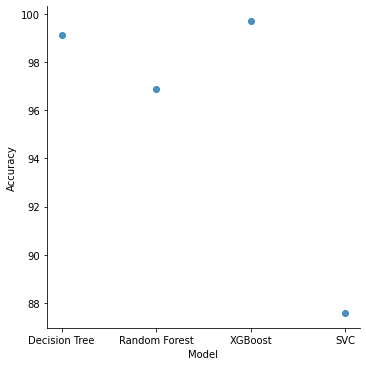

In [365]:
df = pd.DataFrame({"Accuracy": performances, "Model":["Decision Tree","Random Forest","XGBoost","SVC"]})
# control x and y limits
sns.lmplot( y="Accuracy", x="Model", data=df, fit_reg=False)

Decision Tree and XGBoost seems to be more accurate than SVC and Random Forest models.
One way to further our accuracy with xgboost would be hyperparameter tuning with SearchGridCV.
On the other hand, we can increase the performance of SVC via more advanced feature extractions using correlation matrix more efficiently.